## MAP0214 - Cálculo Numérico e aplicações em física
### Henrique Bueno de Lima - Nº USP: 9302305
### EP3 - Integração Numérica- Profº Arnaldo Gammal

Notebook no qual desenvolvi meu EP. Meus resultados são apresentados por etapas a), b), c) e d) ao longo do código:

In [20]:
import numpy as np
from sympy import *
from astropy import units as u
from astropy.table import Table
import matplotlib.pyplot as pl
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

### 1) Seja a integral:
### $I=\int_{0}^{1}\left(6-6 x^{5}\right) d x$
### a) Método de Simpson - precisão simples (float32)

In [2]:
def integração_simpson(f,a,b,p):
    N = 2**p
    if N % 2 == 1:
        raise ValueError("N precisa ser um número inteiro par.")
    h = (b-a)/N
    x = np.linspace(a,b,N+1, dtype=np.float32) # Cada x tem precisão simples
    y = f(x) # Teremos um vetor com valores de f(x) para cada x em [a,b], na mesma precisão
    S = h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return np.float32(S) # Aqui definimos a integral com a precisão que queremos

#### Defini a função $f(x)$ do problema e testei o resultado da integração:

In [3]:
def f(x):
    return 6 - 6*x**5
integração_simpson(f, 0.,1.,25) # Apenas um exemplo da tabela do enunciado do EP3 para conferir que a função
                                      # integra coretamente

5.0

### b) Preenchimento de tabela para $N = 2^p$ intervalos, sendo que p vai de 1 à 25 com o valor da integral para dado N e seu erro do valor verdadeiro.

In [4]:
simples = np.float32
dupla = np.float64

#### Primeiro fiz a integral analítica e criei outra função que aceita números como parâmetros e retorna a integral definida:

In [5]:
x = Symbol('x')
f_symbol = 6 - 6* x**5
integrate(f_symbol) # integral analítica

-x**6 + 6*x

In [6]:
def integral_analítica(x): #usaremos ela para calcular o erro
    return -x**6 + 6*x

I = simples(integral_analítica(1.) - integral_analítica(0.)) # O valor da integral definida está contido
                                                                # nesse elemtento I, com precisão simples.
I

5.0

### Vamos à montagem da tabela com p variando - precisão simples:

In [7]:
tabela = Table(names=('p', 'N', 'I_n', 'erro'), dtype=('int32', 'int32', simples,simples)) # Formato da minha tabela

# Alterando um pouco a função de integração para ela ter como output p, n, erro e então já montar a tabela:
def integração_simpson(f, a, b, p, precisao):
    pvec = np.linspace(1, p, p, dtype=int) # p com precisão simples
    print('O vetor p é:', pvec)
    for p in pvec:
        N = 2**p
        if N % 2 == 1:
            raise ValueError("N precisa ser um número inteiro par.")
        h = precisao((b-a)/N)
        x = np.linspace(a,b,N+1, dtype=precisao) # Cada x tem precisão simples
        y = precisao(f(x)) # Teremos um vetor com valores de f(x) para cada x em [a,b], na mesma precisão
        S = h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
        erro = abs(S - I)
        tabela.add_row((p, N, precisao(S), precisao(erro))) # A cada passo, a função preenche a tabela.
    print('Sua tabela foi montada:')
    return tabela

In [8]:
integração_simpson(f, 0., 1., 25, simples)

O vetor p é: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Sua tabela foi montada:


p,N,I_n,erro
int32,int32,float32,float32
1,2,4.875,0.125
2,4,4.9921875,0.0078125
3,8,4.9995117,0.00048828125
4,16,4.9999695,3.0517578e-05
5,32,4.999998,1.9073486e-06
6,64,5.0,0.0
7,128,5.0,0.0
8,256,5.0,0.0
9,512,5.0,0.0


### c) Agora, com precisão dupla

In [9]:
integração_simpson(f, 0., 1., 25, dupla)

O vetor p é: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Sua tabela foi montada:


p,N,I_n,erro
int32,int32,float32,float32
1,2,4.875,0.125
2,4,4.9921875,0.0078125
3,8,4.9995117,0.00048828125
4,16,4.9999695,3.0517578e-05
5,32,4.999998,1.9073486e-06
6,64,5.0,0.0
7,128,5.0,0.0
8,256,5.0,0.0
9,512,5.0,0.0


### 2) Pêndulo simples: $T=4 \sqrt{\frac{l}{g}} \int_{0}^{\pi / 2} \frac{1}{\sqrt{1-k^{2} \sin ^{2} \phi}} d \phi$

In [10]:
def integração_trapézio(f, a, b, n):
    h = (b-a)/n
    s = 0.5*(f(a) + f(b))
    for i in range(1,n,1):
        s = s + f(a + i*h)
    return h*s

In [11]:
tabela2 = Table(names=('theta0', 'T')) # Formato da minha tabela

In [12]:
def T(phi_a, phi_b, N):
    v = np.sqrt(1/9.8) # Assumi l = 1 e g = 9.8 por simplicidade
    theta = np.linspace(0., np.pi, N)
    for theta0 in theta:
        k = np.sqrt(0.5*(1-np.cos(theta0)))
        f = lambda phi: 1/np.sqrt(1-(k*np.sin(phi))**2)
        I = 4* v* integração_trapézio(f, phi_a, phi_b, 100) # Usei 100 divisões trapezoidais
        tabela2.add_row((theta0, I)) # A cada passo, a função preenche a tabela.
    return tabela2

In [13]:
T(0, np.pi/2, 20)

/home/hbueno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


theta0,T
float64,float64
0.0,2.0070899231544934
0.16534698176788384,2.0105248724292566
0.3306939635357677,2.0208947647729523
0.4960409453036515,2.0383982987929903
0.6613879270715354,2.063378941687485
0.8267349088394192,2.096344939029932
0.992081890607303,2.138000784577912
1.1574288723751869,2.1892945326484674
1.3227758541430708,2.2514882860071204


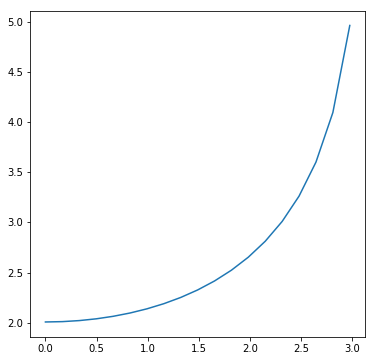

In [29]:
pl.plot(tabela2['theta0'], tabela2['T'])

### 3) Cálculo de $π$ a partir da área do primeiro quadrante do círculo limitado pela curva $x^2+y^2 = 1$ usando o método de Monte-Carlo

In [ ]:
a = 16807
m = 2147483647
z0 = 9302305
def gera_Z(z0, a, m):
    Z=[]
    U=[]
    Z.append(z0)
    for i in tqdm(range(m)):
        z0 = a*z0%m
        Z.append(z0)
        U.append(z0/m)
    return Z, U

### b)

In [34]:
N = 100
x = np.random.random(N)
y = np.random.random(N)
theta = np.linspace(0.,2.*np.pi, 1000)

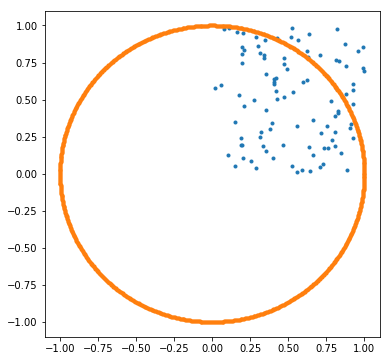

In [35]:
pl.plot(x, y, marker='.', lw=0.)
pl.plot(np.cos(theta), np.sin(theta), marker='.', lw=0.)

In [41]:
n = len(np.argwhere(x**2 + y**2 <= 1)) # quantos pontos estão no círculo
n

78

In [40]:
p = 4* n/N # prob dentre os 100 de estar no círculo
p

3.12

In [68]:
array_tent = []
x=2
while(x <= 131072):
    array_tent.append(x)
    x = x + 2

In [61]:
def lança_moedas(N):
    n=100
    x=np.random.random(n*N)
    y=np.random.random(n*N)
    I = 4*len(np.argwhere(x**2 + y**2 <= 1))/(N*n)
    return I

In [ ]:
tabela3 = Table(names=('N', 'Im', 'sigma', 'sigma_m')) # Formato da minha tabela

for N_tot in tqdm(array_tent):
    I = lança_moedas(N_tot)
    Im = np.mean(I)
    sigma = np.sqrt(1/(N_tot-1) * np.sum((I-Im)**2))
    sigma_m = sigma/np.sqrt(N_tot*n)
    tabela3.add_row((N_tot, Im, sigma, sigma_m)) # A cada passo, a função preenche a tabela.

 92%|█████████▏| 60411/65536 [16:10:19<1:05:45,  1.30it/s]

In [ ]:
tabela3